In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score


In [6]:
import warnings

def warn(*args,**kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings('ignore')

In [7]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
data.shape

(2111, 17)

## Explotatory Data Analysis

In [8]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

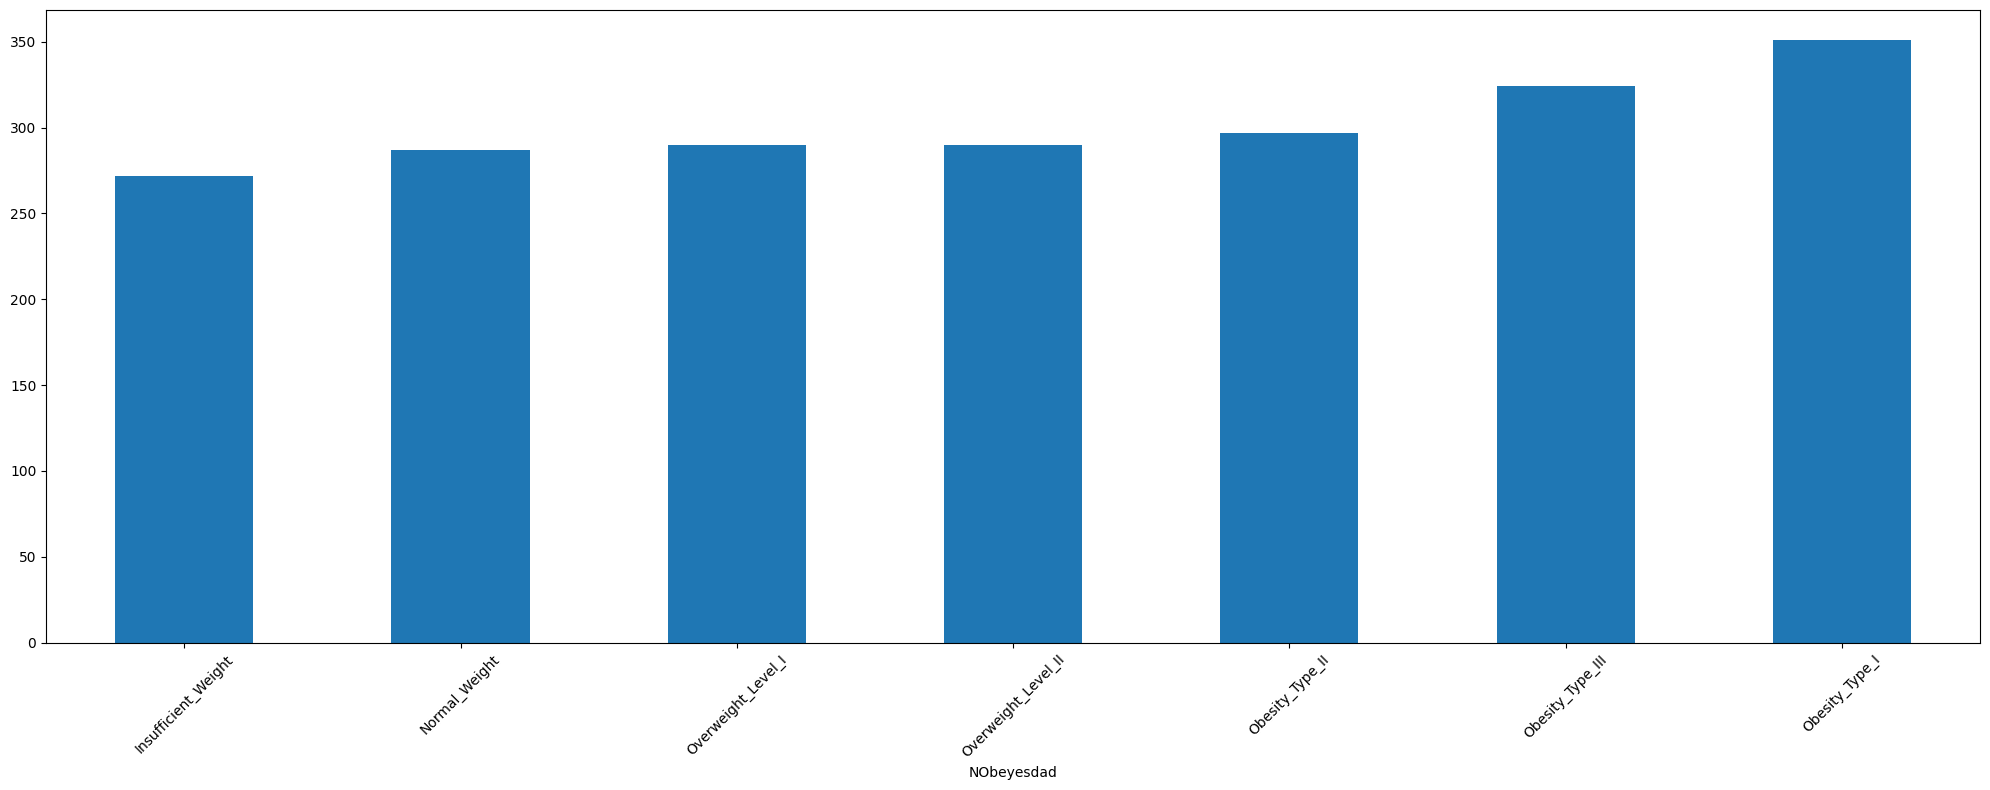

In [20]:
obesity = data['NObeyesdad']
plt.figure(figsize = (20,8))
obesity.value_counts().sort_values().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

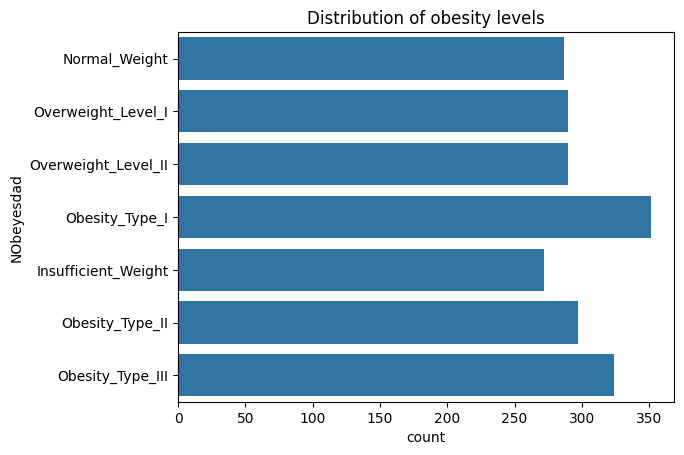

In [21]:
sns.countplot(y = 'NObeyesdad', data = data)
plt.title("Distribution of obesity levels")
plt.show()

In [22]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There is no null value presents in any of the column

In [23]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Preprocessing Data

#### Feature Scaling

In [28]:
continuous_columns = data.select_dtypes(include = ['float64']).columns.tolist()

scaler = StandardScaler()

scaled_features = scaler.fit_transform(data[continuous_columns])

scaled_df = pd.DataFrame(scaled_features, columns = scaler.get_feature_names_out(continuous_columns))

scaled_data = pd.concat([data.drop(columns = continuous_columns), scaled_df], axis =1)

In [29]:
scaled_data.sample(5)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
1432,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_I,-0.279561,-1.047508,-0.174658,-2.426697,-2.147847,0.055591,0.983510,1.261923
1093,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Overweight_Level_II,-0.509139,-2.306894,-1.010811,-0.785019,-2.032496,-1.644905,-1.188039,0.511235
1591,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_II,0.221441,-0.302161,0.653815,0.468164,-1.994341,-1.188901,-1.055829,0.784577
449,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Normal_Weight,-0.994977,-0.768388,-0.900748,-2.658379,0.404153,-0.013073,1.163820,2.204618
201,Female,yes,yes,Always,no,no,Sometimes,Automobile,Obesity_Type_I,2.630230,-1.733197,-0.251521,-0.785019,0.404153,-1.644905,-1.188039,-1.080625


## One-hot encoding

In [33]:
# identifying categorical columns
categorical_columns = data.select_dtypes(include = ['object']).columns.tolist()

categorical_columns.remove('NObeyesdad')

# Apply one hot encoding
encoder = OneHotEncoder(sparse_output=False, drop = 'first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])


# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns = encoder.get_feature_names_out(categorical_columns))

# Combining with originial dataset
prepped_data = pd.concat([scaled_data.drop(columns = categorical_columns), encoded_df], axis = 1)

In [34]:
prepped_data.sample(5)

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1822,Obesity_Type_III,0.029124,0.379263,1.754478,1.088342,0.404153,1.399424,-0.042843,-0.122237,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1030,Overweight_Level_II,1.572339,1.436500,0.360224,-0.785019,-1.464237,1.618759,-0.012109,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
356,Insufficient_Weight,-1.152595,2.126038,-1.015318,1.088342,0.404153,-0.013073,2.339750,0.561997,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1499,Obesity_Type_I,-0.168004,-0.522137,0.256797,-1.967150,0.404153,-0.089521,-1.064911,-0.716242,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
559,Insufficient_Weight,-0.692252,0.716270,-1.099703,-0.785019,1.557425,1.002967,1.163820,2.030673,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
prepped_data.columns

Index(['NObeyesdad', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [36]:
prepped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NObeyesdad                          2111 non-null   object 
 1   Age                                 2111 non-null   float64
 2   Height                              2111 non-null   float64
 3   Weight                              2111 non-null   float64
 4   FCVC                                2111 non-null   float64
 5   NCP                                 2111 non-null   float64
 6   CH2O                                2111 non-null   float64
 7   FAF                                 2111 non-null   float64
 8   TUE                                 2111 non-null   float64
 9   Gender_Male                         2111 non-null   float64
 10  family_history_with_overweight_yes  2111 non-null   float64
 11  FAVC_yes                            2111 no

## Encode the target variable

In [37]:
## Encoding the target variable
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
prepped_data['NObeyesdad'].unique()

array([1, 5, 6, 2, 0, 3, 4], dtype=int8)

## Separate the input and target data

In [39]:
X = prepped_data.drop(columns='NObeyesdad')
y = prepped_data['NObeyesdad']

In [41]:
X.shape

(2111, 23)

## Model Training and Evaluation

In [42]:
## Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [43]:
model_ova = LogisticRegression(multi_class = 'ovr', max_iter=1000)
model_ova.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [45]:
#prediction
y_pred_ova = model_ova.predict(X_test)

#evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100* accuracy_score(y_test, y_pred_ova))}")

One-vs-All (OvA) Strategy
Accuracy: 74.0


## Trying OnevsOne

In [46]:
from sklearn.multiclass import OneVsOneClassifier
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [48]:
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100* accuracy_score(y_test,y_pred_ovo),2)}")

One-vs-One (OvO) Strategy
Accuracy: 93.38


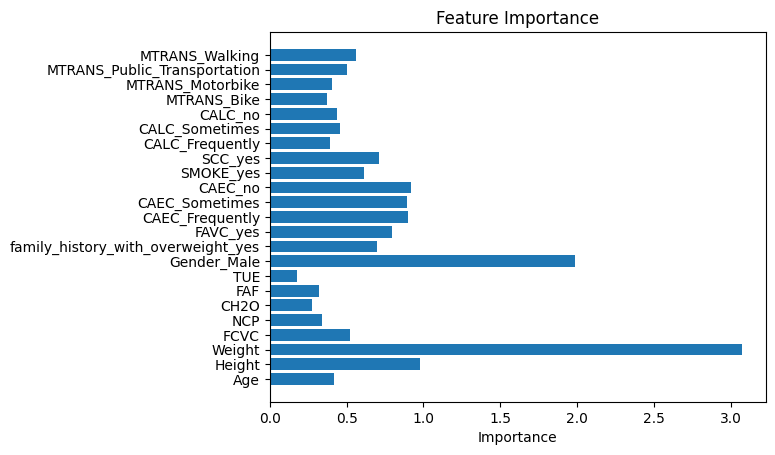

In [49]:
feature_importance = np.mean(np.abs(model_ova.coef_), axis = 0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

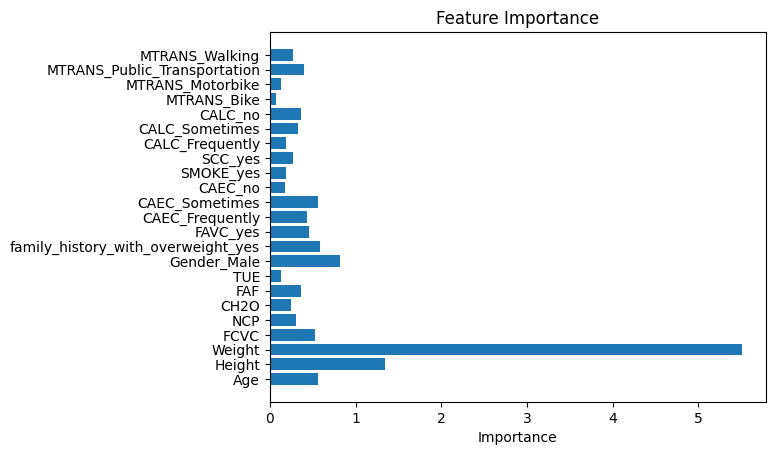

In [51]:
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])


feature_importance = np.mean(np.abs(coefs), axis = 0)

plt.barh(X.columns,feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

In [81]:
def obesity_risk_pipeline(data_file,model,loss):
    df = pd.read_csv(data_file)

    # Feature scaling
    numerical_columns = df.select_dtypes(include = ['float64']).columns.tolist()
    categorical_columns = df.select_dtypes(include = ['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')
    print(categorical_columns)
    # preprocessing the data
    # std scaling the numerical data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[numerical_columns])
    scaled_df = pd.DataFrame(X_scaled, columns=scaler.get_feature_names_out(numerical_columns))
    new_scaled_df = pd.concat([df.drop(columns=numerical_columns), scaled_df], axis = 1)
    print(f"Dataframe after standard scaling: {new_scaled_df.head()}")

    
    # onehot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(new_scaled_df[categorical_columns])
    encoded_df = pd.DataFrame(encoded_features, columns = encoder.get_feature_names_out(categorical_columns))
    processed_df = pd.concat([new_scaled_df.drop(columns = categorical_columns), encoded_df], axis= 1)
    processed_df['NObeyesdad'] = processed_df['NObeyesdad'].astype('category').cat.codes
    print(f"Dataframe after onehotencoding: \n{processed_df.sample(5)}")
    # Drop the label
    X = processed_df.drop(columns = ['NObeyesdad']).to_numpy()
    y = processed_df['NObeyesdad'].to_numpy()

    

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

    # train the model
    model.fit(X_train, y_train)

    # Predict the result
    y_hat = model.predict(X_test)

    
    # Generate the loss
    accuracy = loss(y_test,y_hat)

    return f"Accuracy: {np.round((100*accuracy),2)}"

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'ovr', max_iter=1000)

data_file = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"

from sklearn.metrics import accuracy_score

final_acc = obesity_risk_pipeline(data_file = data_file, model = lr, loss = accuracy_score)


['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Dataframe after standard scaling:    Gender family_history_with_overweight FAVC       CAEC SMOKE  SCC  \
0  Female                            yes   no  Sometimes    no   no   
1  Female                            yes   no  Sometimes   yes  yes   
2    Male                            yes   no  Sometimes    no   no   
3    Male                             no   no  Sometimes    no   no   
4    Male                             no   no  Sometimes    no   no   

         CALC                 MTRANS           NObeyesdad       Age    Height  \
0          no  Public_Transportation        Normal_Weight -0.522124 -0.875589   
1   Sometimes  Public_Transportation        Normal_Weight -0.522124 -1.947599   
2  Frequently  Public_Transportation        Normal_Weight -0.206889  1.054029   
3  Frequently                Walking   Overweight_Level_I  0.423582  1.054029   
4   Sometimes  Public_Transportation  O

In [83]:
final_acc

'Accuracy: 75.39'